In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Ejercicio 1

In [195]:
datos = pd.read_excel('wind_data.xlsx')
print(datos)

       dia  regional wind  wind gap norte sur
0        1       8.000000            0.000000
1        2       8.346296            0.181523
2        3      10.062316            0.188643
3        4      10.791337            0.071085
4        5      10.754093            0.078442
...    ...            ...                 ...
3645  3646       8.642231           -0.869425
3646  3647       6.527408           -1.268447
3647  3648       6.230707           -1.149234
3648  3649       5.550882           -0.420431
3649  3650       6.545450            0.250088

[3650 rows x 3 columns]


In [196]:
datos['wind dif'] = datos['regional wind'].diff().shift(-1) #Si+1 - Si
print(datos)

       dia  regional wind  wind gap norte sur  wind dif
0        1       8.000000            0.000000  0.346296
1        2       8.346296            0.181523  1.716019
2        3      10.062316            0.188643  0.729021
3        4      10.791337            0.071085 -0.037244
4        5      10.754093            0.078442  0.017364
...    ...            ...                 ...       ...
3645  3646       8.642231           -0.869425 -2.114824
3646  3647       6.527408           -1.268447 -0.296701
3647  3648       6.230707           -1.149234 -0.679825
3648  3649       5.550882           -0.420431  0.994568
3649  3650       6.545450            0.250088       NaN

[3650 rows x 4 columns]


In [197]:
#datos_filtrados = datos.dropna(subset=['wind dif'])
datos['theta'] = 6 + 2 * np.cos(2 * np.pi * datos['dia'] / 365)

# Calcular theta(t_i) - S_i
datos['theta_minus_S'] = datos['theta'] - datos['regional wind']
data_filtrada = datos.dropna(subset=['wind dif', 'theta_minus_S'])

slope, intercept, r_value, p_value, std_err = stats.linregress(data_filtrada['theta_minus_S'], data_filtrada['wind dif'])

beta_1 = slope
beta_0 = intercept

print('beta_0:', beta_0)
print('beta_1:', beta_1)
print('std_err:', std_err)

beta_0: -0.01090490726175827
beta_1: 0.29874316789949523
std_err: 0.01177072911949767


In [198]:
kappa = (365 * beta_1) #PREGUNTAR SI ES MENOS O MÁS
print('kappa:', kappa)

kappa: 109.04125628331576


In [199]:
# Calcular los residuos
residuos = data_filtrada['wind dif'] - (slope * data_filtrada['theta_minus_S'] + intercept)

# Calcular el error estándar de los residuos
residual_std_err = np.std(residuos, ddof=1)  # ddof=1 para usar n-1 en la fórmula de la desviación estándar
print('residual_std_err:', residual_std_err)
# Calcular sigma
sigma = residual_std_err * np.sqrt(365)
print('sigma:', sigma)

residual_std_err: 0.8399264390386392
sigma: 16.046772086422457


In [200]:
datos['gap dif'] = datos['wind gap norte sur'] - datos['wind gap norte sur'].shift(1)
print(datos)

       dia  regional wind  wind gap norte sur  wind dif     theta  \
0        1       8.000000            0.000000  0.346296  7.999704   
1        2       8.346296            0.181523  1.716019  7.998815   
2        3      10.062316            0.188643  0.729021  7.997334   
3        4      10.791337            0.071085 -0.037244  7.995261   
4        5      10.754093            0.078442  0.017364  7.992596   
...    ...            ...                 ...       ...       ...   
3645  3646       8.642231           -0.869425 -2.114824  7.995261   
3646  3647       6.527408           -1.268447 -0.296701  7.997334   
3647  3648       6.230707           -1.149234 -0.679825  7.998815   
3648  3649       5.550882           -0.420431  0.994568  7.999704   
3649  3650       6.545450            0.250088       NaN  8.000000   

      theta_minus_S   gap dif  
0         -0.000296       NaN  
1         -0.347482  0.181523  
2         -2.064982  0.007120  
3         -2.796076 -0.117558  
4         -

In [201]:
datos_filtrados_gap = datos.dropna(subset=['gap dif'])

slope_gap, intercept_gap, r_value_gap, p_value_gap, std_err_gap = stats.linregress(datos_filtrados_gap['wind gap norte sur'], datos_filtrados_gap['gap dif'])

beta_1_gap = slope_gap
beta_0_gap = intercept_gap

print('beta_0:', beta_0_gap)
print('beta_1:', beta_1_gap)

beta_0: -0.004013223850057093
beta_1: 0.1325505861738276


In [202]:
beta = 365 * beta_1_gap
beta

48.38096395344707

In [203]:
# Calcular los residuos
residuos_gap = datos_filtrados_gap['gap dif'] - (slope_gap * datos_filtrados_gap['wind gap norte sur'] + intercept_gap)

# Calcular el error estándar de los residuos
residual_gap_std_err = np.std(residuos_gap, ddof=1)  # ddof=1 para usar n-1 en la fórmula de la desviación estándar
print('residual_std_err:', residual_gap_std_err)
# Calcular sigma
gamma = residual_gap_std_err * np.sqrt(365)
print('gamma:', gamma)

residual_std_err: 0.5282417805574243
gamma: 10.092045047222316


## Ejercicio 2

In [204]:
def theta(t):
    return 6 + 2 * np.cos(2 * np.pi * t / 365)

In [205]:
def simulacion ():
    caminos_S = []
    caminos_D = []

    for m in range(1000):
        S = np.zeros(3650)
        D = np.zeros(3650)

        # Valores iniciales (suponemos que S_0 y D_0 son conocidos o se dan como 0)
        S[0] = np.mean(datos['regional wind'])
        D[0] = 0

        for i in range(1, 3650):
            S[i] = S[i - 1] + kappa * (theta(i) - S[i - 1]) * 1/365 + sigma * np.sqrt(1/365) * np.random.normal(0, 1)
            
            D[i] = D[i-1] - beta * D[i-1] * 1/365 + gamma * np.sqrt(1/365) * np.random.normal(0, 1)

        caminos_S.append(S)
        caminos_D.append(D)
    return caminos_S, caminos_D

In [206]:
caminos_S, caminos_D = simulacion()

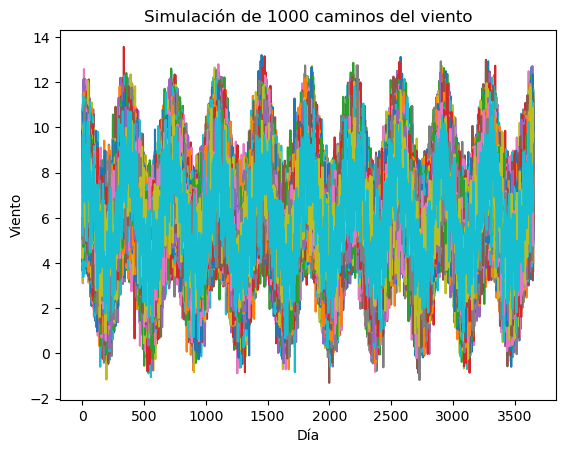

In [207]:
for i in range(1000):
    plt.plot(caminos_S[i])

plt.title('Simulación de 1000 caminos del viento')
plt.xlabel('Día')
plt.ylabel('Viento')
plt.show()
#PREGUNTAR LO DEL GEOMETRIC WALK

In [208]:
plt.plot(datos['dia'], datos['regional wind'])
plt.title('Viento regional')
plt.xlabel('Día')
plt.ylabel('Viento')
plt.show()

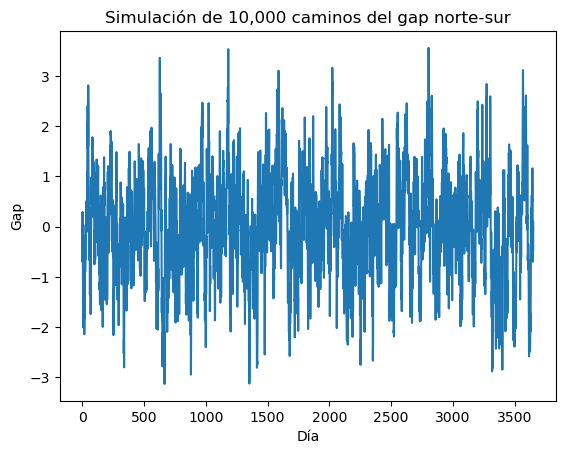

In [209]:
for i in range(1):
    plt.plot(caminos_D[i])
plt.title('Simulación de 10,000 caminos del gap norte-sur')
plt.xlabel('Día')
plt.ylabel('Gap')
plt.show()

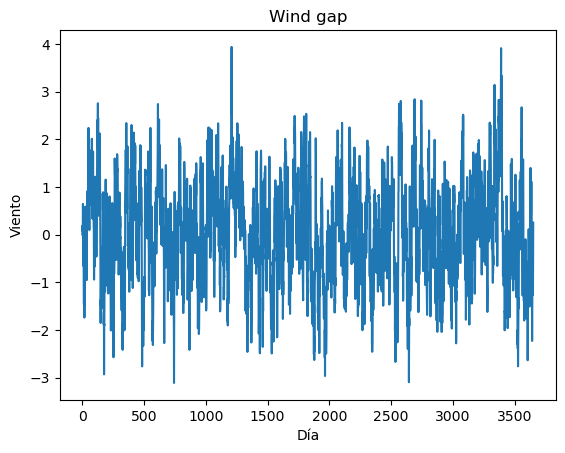

In [210]:
plt.plot(datos['dia'], datos['wind gap norte sur'])
plt.title('Wind gap')
plt.xlabel('Día')
plt.ylabel('Viento')
plt.show()

In [211]:
S = np.mean(caminos_S, axis=0)
D = np.mean(caminos_D, axis=0)

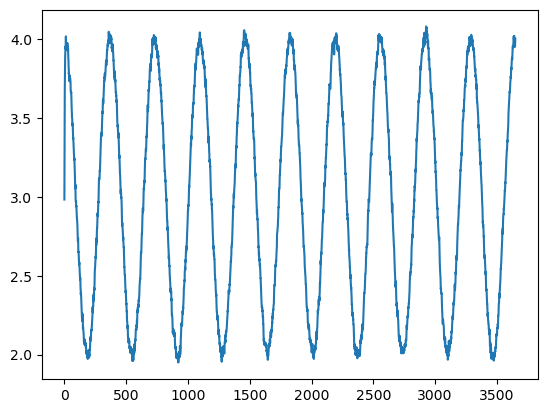

In [212]:
#Viento en molino norte
S_norte = (S+D)/2

plt.plot(S_norte)
plt.show()

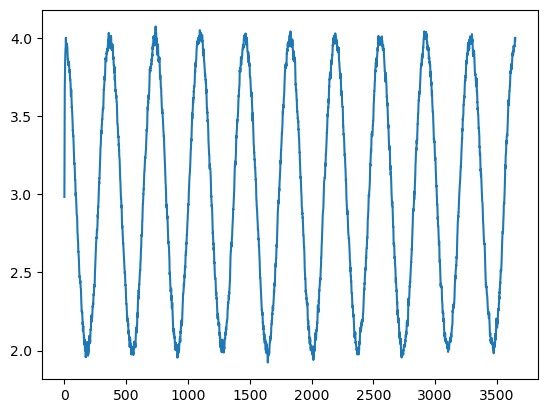

In [213]:
S_sur = (S-D)/2

plt.plot(S_sur)
plt.show()

In [214]:
print(datos)

       dia  regional wind  wind gap norte sur  wind dif     theta  \
0        1       8.000000            0.000000  0.346296  7.999704   
1        2       8.346296            0.181523  1.716019  7.998815   
2        3      10.062316            0.188643  0.729021  7.997334   
3        4      10.791337            0.071085 -0.037244  7.995261   
4        5      10.754093            0.078442  0.017364  7.992596   
...    ...            ...                 ...       ...       ...   
3645  3646       8.642231           -0.869425 -2.114824  7.995261   
3646  3647       6.527408           -1.268447 -0.296701  7.997334   
3647  3648       6.230707           -1.149234 -0.679825  7.998815   
3648  3649       5.550882           -0.420431  0.994568  7.999704   
3649  3650       6.545450            0.250088       NaN  8.000000   

      theta_minus_S   gap dif  
0         -0.000296       NaN  
1         -0.347482  0.181523  
2         -2.064982  0.007120  
3         -2.796076 -0.117558  
4         -

Media del viento simulado: 5.991665777743163
Desviación estándar del viento simulado: 1.8874852353421405
Media del viento histórico: 5.964442822277723
Desviación estándar del viento histórico: 1.8032133987250791
Media de la diferencia simulada: -0.01926959196927647
Desviación estándar de la diferencia simulada: 1.0376953217300668
Media de la diferencia histórica: 0.03078554102481403
Desviación estándar de la diferencia histórica: 1.0614721182882032


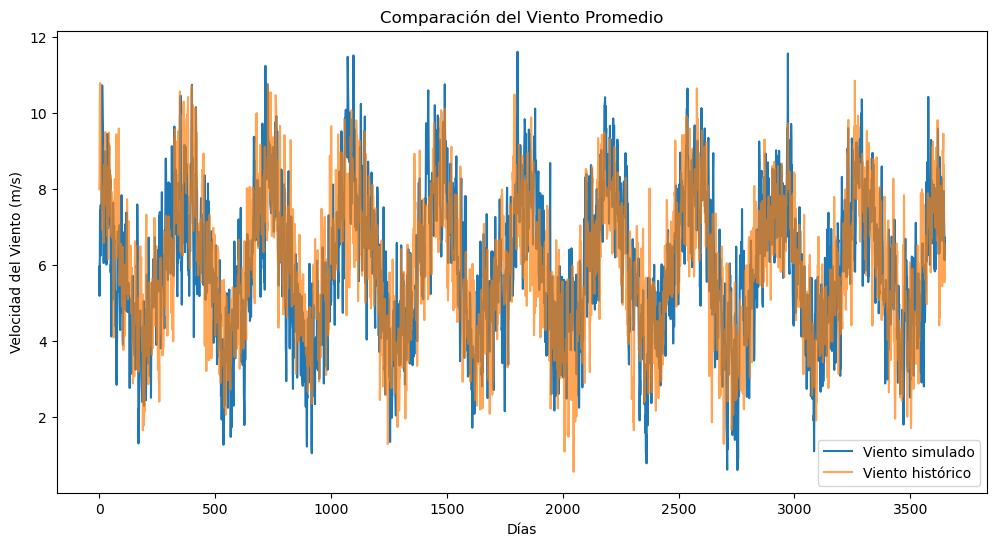

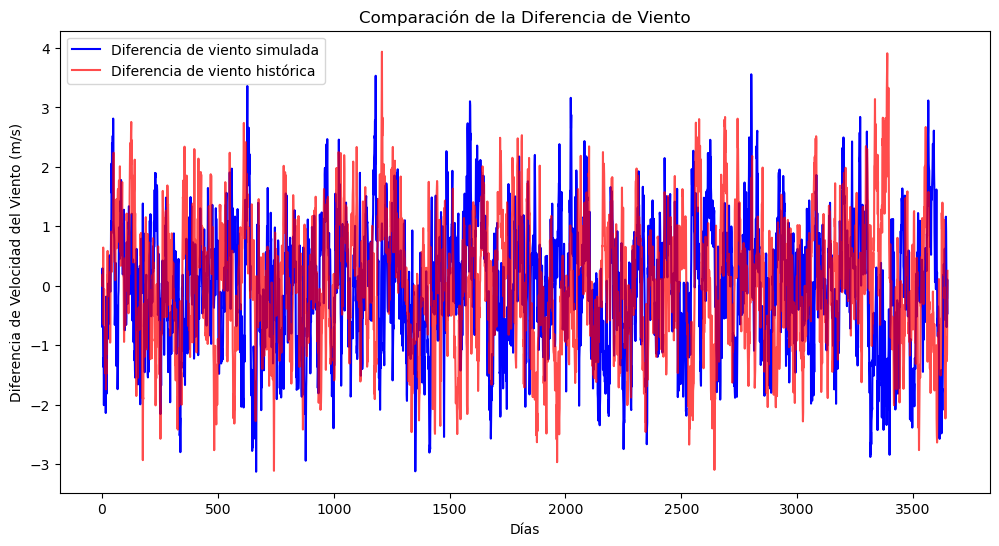

In [215]:
# Supongamos que tienes datos históricos de 'wind' y 'wind dif'
historical_wind = datos['regional wind']  # Reemplaza con la columna correcta
historical_wind_dif = datos['wind gap norte sur']

# Comparación de la media y desviación estándar
print(f"Media del viento simulado: {np.mean(caminos_S[0])}")
print(f"Desviación estándar del viento simulado: {np.std(caminos_S[0])}")
print(f"Media del viento histórico: {np.mean(historical_wind)}")
print(f"Desviación estándar del viento histórico: {np.std(historical_wind)}")

# Similar para la diferencia de viento
print(f"Media de la diferencia simulada: {np.mean(caminos_D[0])}")
print(f"Desviación estándar de la diferencia simulada: {np.std(caminos_D[0])}")
print(f"Media de la diferencia histórica: {np.mean(historical_wind_dif)}")
print(f"Desviación estándar de la diferencia histórica: {np.std(historical_wind_dif)}")

# Gráfico comparativo
plt.figure(figsize=(12, 6))
plt.plot(caminos_S[0], label='Viento simulado')
plt.plot(historical_wind, label='Viento histórico', alpha=0.7)
plt.title('Comparación del Viento Promedio')
plt.xlabel('Días')
plt.ylabel('Velocidad del Viento (m/s)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(caminos_D[0], label='Diferencia de viento simulada', color='blue')
plt.plot(historical_wind_dif, label='Diferencia de viento histórica', color='red', alpha=0.7)
plt.title('Comparación de la Diferencia de Viento')
plt.xlabel('Días')
plt.ylabel('Diferencia de Velocidad del Viento (m/s)')
plt.legend()
plt.show()


## Ejercicio 3


In [216]:
# Definición de variables iniciales
K = np.mean(datos['regional wind'])  # Umbral de apagado/encendido
n_days = 365
r = 0.05  # Tasa de interés anual para el descuento de cashflows

# Inicialización de listas para almacenar resultados
caminos_S = []
caminos_D = []
cashflows_totales = []

for m in range(1000):  # 1000 simulaciones
    S = np.zeros(n_days)
    D = np.zeros(n_days)
    estado_molino = np.ones(n_days)  # 1 = activo, 0 = inactivo
    cashflow = np.zeros(n_days)

    # Valores iniciales
    S[0] = np.mean(datos['regional wind'])
    D[0] = 0

    for i in range(1, n_days):
        # Evolución del viento regional y la diferencia de viento
        S[i] = S[i - 1] + kappa * (theta(i) - S[i - 1]) * 1/365 + sigma * np.sqrt(1/365) * np.random.normal(0, 1)
        D[i] = D[i-1] - beta * D[i-1] * 1/365 + gamma * np.sqrt(1/365) * np.random.normal(0, 1)
        # Decisión de apagado o encendido
        if estado_molino[i-1] == 1 and S[i] > K:
            estado_molino[i] = 0
            cashflow[i] -= 1000  # Costo de apagar el molino
        elif estado_molino[i-1] == 0 and S[i] <= K:
            estado_molino[i] = 1
        
        # Evaluar si hay rotura
        if estado_molino[i] == 1:
            prob_rotura = 0.25 * (S[i]**2) * (1/365)
            if np.random.rand() < prob_rotura:
                estado_molino[i] = 0  # Molino roto
                cashflow[i] -= 200000  # Costo de reparación

        # Calcular ingresos
        if estado_molino[i] == 1:
            cashflow[i] += 1000 * S[i]
            print(cashflow[i])
    
    # Descuento de cashflows para obtener el VAN para esta simulación
    VAN = np.sum(cashflow * np.exp(-r * np.arange(n_days) / 365))
    cashflows_totales.append(VAN)

    # Almacenar las trayectorias
    caminos_S.append(S)
    caminos_D.append(D)

# Calcular el VAN promedio
VAN_promedio = np.mean(cashflows_totales)
print(f"VAN Promedio (Valor Actual Neto): {VAN_promedio:.2f}")

7646.138702576247
8311.843703161647
7521.675486094385
8897.523607256433
7584.481854162279
8013.533145904731
7122.985061533519
7144.353422450308
8997.706731232773
8464.722949899093
7731.251737339959
6447.721845226416
7849.35716084772
9988.15180079769
9106.86040887451
7252.579160653291
7252.275410888415
6789.409808343411
7016.58905712373
4945.752593411392
5665.614655041938
8055.9374634055985
9193.38263996093
6651.442478925107
8265.867674692736
8453.933919291916
7144.3694996581635
7887.162891834504
7802.180033002401
9503.312804792382
7516.434118998415
5853.955012016801
7178.627839229874
5414.220078701727
7099.8028904561725
7046.792328448523
7159.239416548498
6609.361927762629
6435.6730072323735
6331.393382058297
4850.315344176044
5755.311814123475
5463.390234853848
5930.916920716025
5350.8974344045855
6977.035606735091
7537.69235005147
7833.862433853496
4756.904289609788
4584.572791010297
5930.637296798812
6376.962062631951
7169.762468423126
6879.316651260123
6206.972438501428
6287.219024

In [217]:
plt.plot(viento_molino1, label = 'Molino 1')
plt.plot(viento_molino2, label = 'Molino 2')
plt.show()

NameError: name 'viento_molino1' is not defined

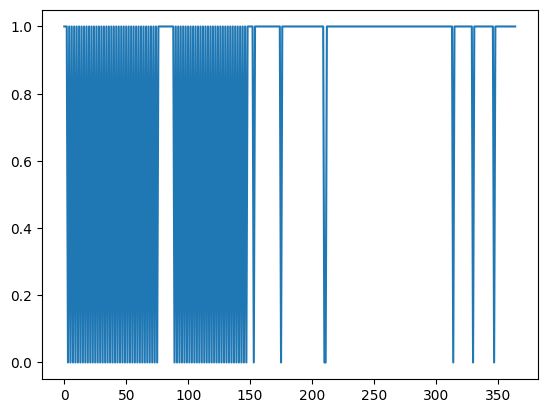

In [ ]:
plt.plot(estado_molino, label = 'Molino 1')
#plt.plot(estado_molino2, label = 'Molino 2')

plt.show()

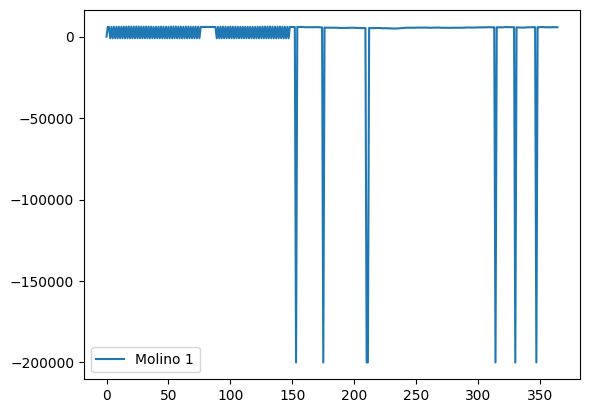

In [ ]:
plt.plot(cashflow, label = 'Molino 1')
#plt.plot(cashflow2, label = 'Molino 2')
plt.legend()
plt.show()